In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


In [3]:
df = pd.read_csv("Carseats.csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Data Set description
**Variable** | **__ Description__** |** Type**
---|---|---
Sales|Unit sales (in thousands) at each location|float
CompPrice|Price charged by competitor at each location|integer
Income|Community income level (in thousands of dollars)|Integer
Advertising|Local advertising budget for company at each location (in thousands of dollars)|integer
Population|Population size in region (in thousands)|Integer
Price|Price company charges for car seats at each site|Integer
ShelveLoc| factor with different levels indicating the quality of the shelving location|Qualitative
Age|Average age of the local population|Integer
Education|Education Level|Integer
Urban|A factor with levels to indicate whether the store is in an urban or rural location|Qualitative
US|Indication of wherether the store is in US or not|Qualitative



In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Exploratory Data ANalysis

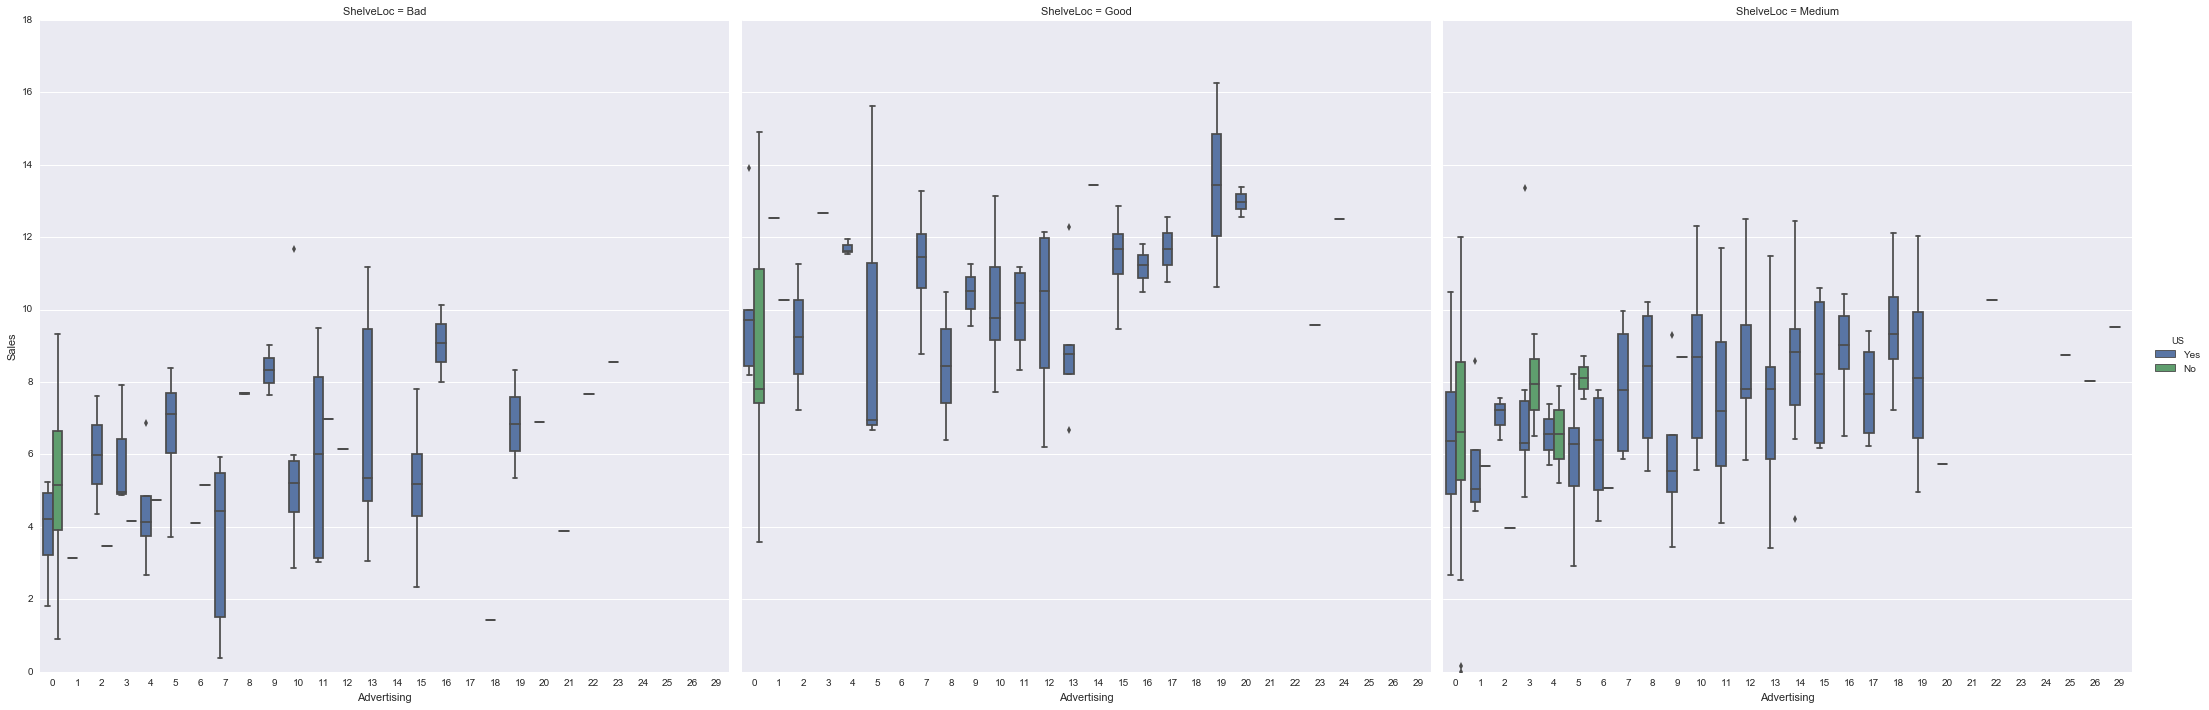

In [23]:
plt.figure(figsize=(20,10))

sns.factorplot(x="Advertising", y="Sales", hue="US",
               col="ShelveLoc", data=df, kind="box", size=10,orient="H");

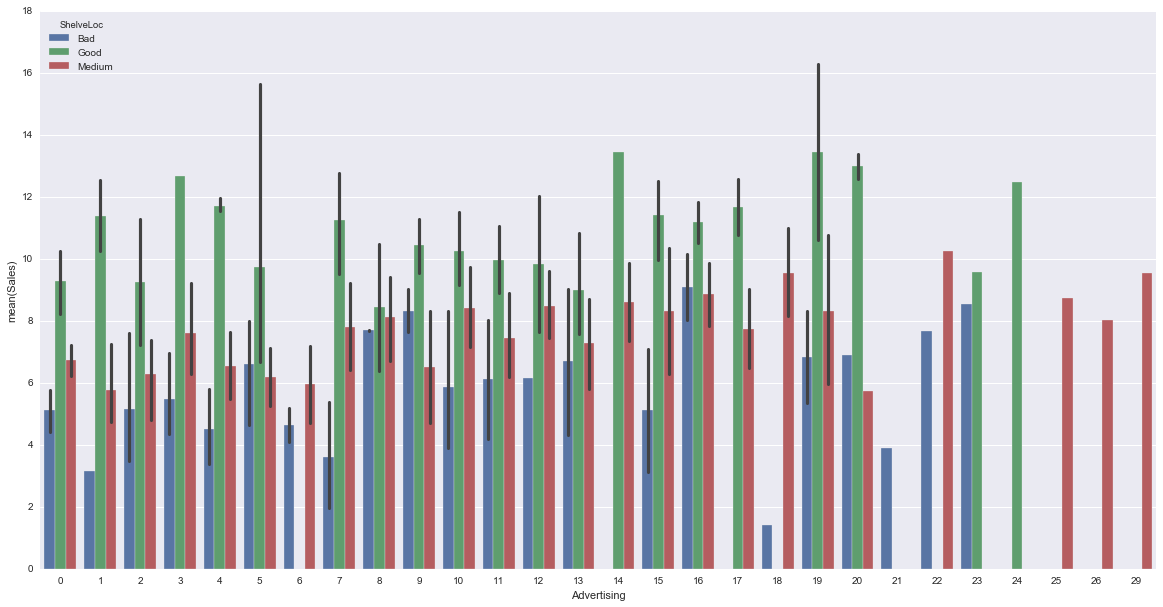

In [7]:
plt.figure(figsize=(20,10))
g = sns.barplot(data = df , orient = 'H',y = 'Sales' , x = 'Advertising' , hue = 'ShelveLoc')
g.size = (20,10)

- As the advertising spend increases sales doesnt necesarily increases but the shelve loc is consistently better 

In [8]:
x_var = ["CompPrice","Income","Advertising","Population","Price","Age","Education","Urban","US"]
y_var = ["Sales"]

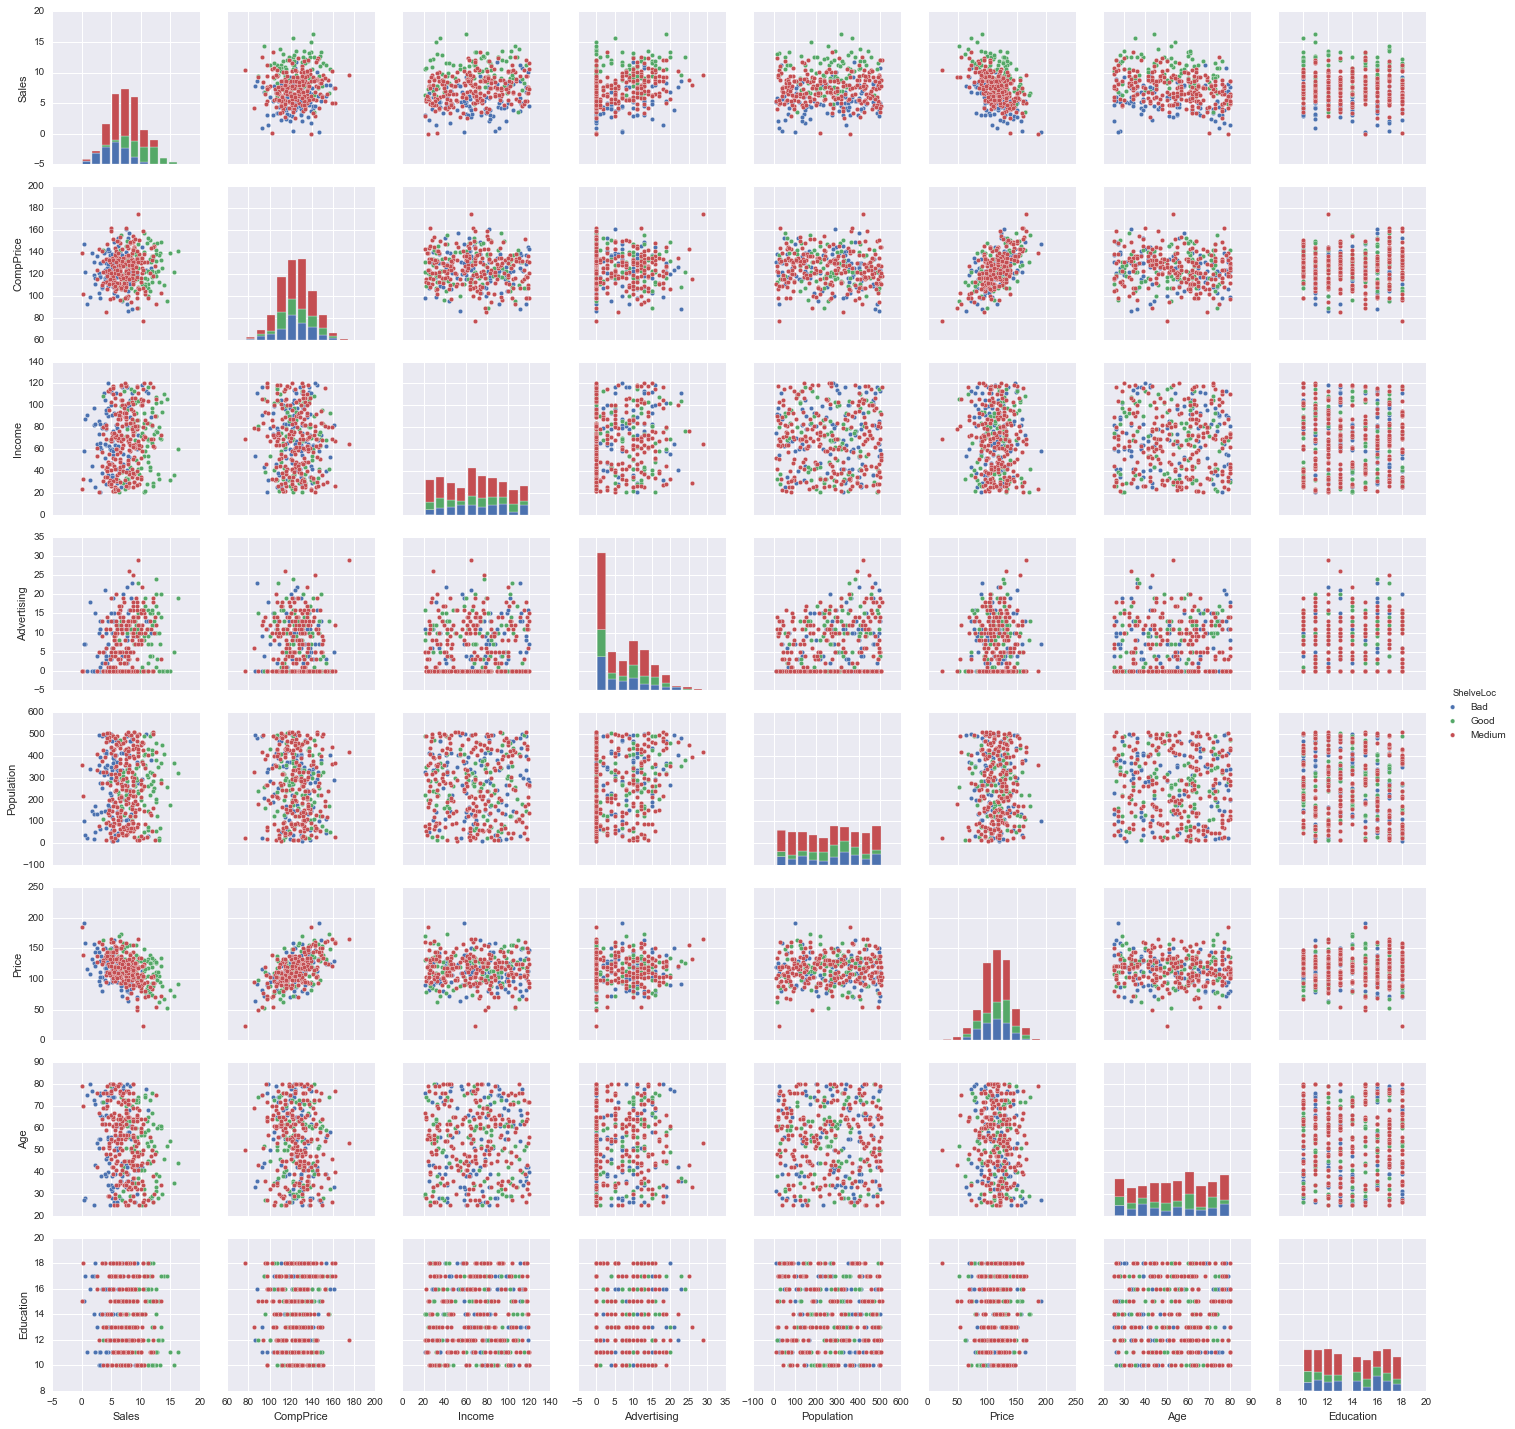

In [9]:
sns.pairplot(data = df , hue = 'ShelveLoc' )

Few observations:
- Sales seem to be impacted by pricing as the pricing goes up sales tend to decline
- Higher Price car seats increasingly find less attractive shelve loc
- Sales tend to increase with income, population , age and Education level


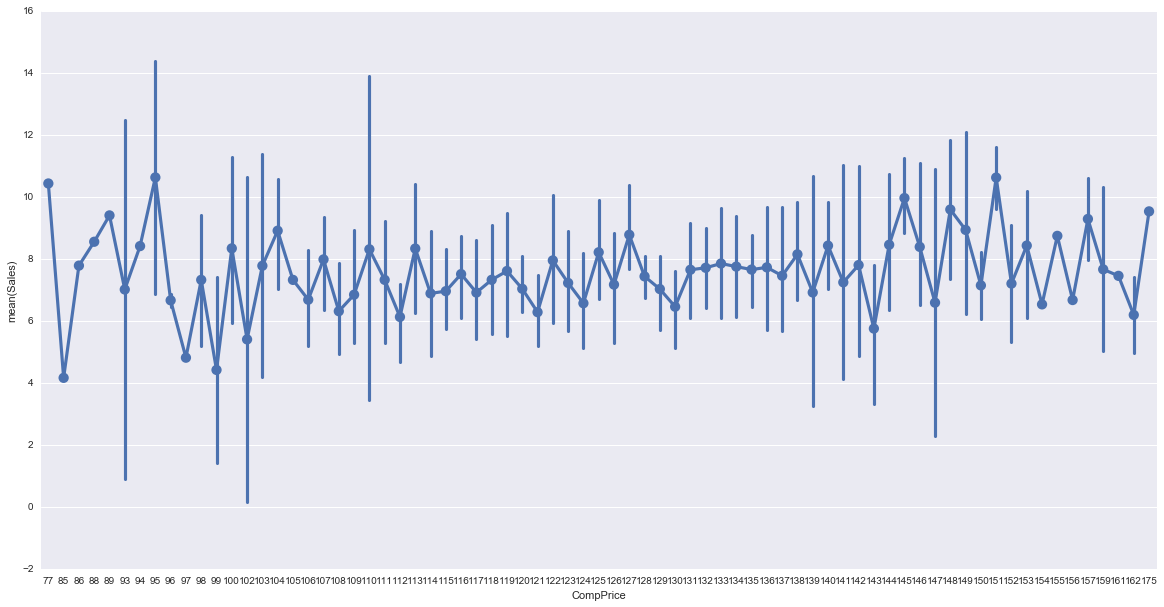

In [10]:
plt.figure(figsize=(20,10))
g = sns.pointplot(data = df ,y = 'Sales' , x = 'CompPrice' )

- There is no real discernable pattern betwen Sales and Competitor's price

In [11]:
# creating Data frames to hold dummy variables
df_loc = pd.get_dummies(df.ShelveLoc,prefix = 'Loc')
df_country = pd.get_dummies(df.US,prefix = 'US')

In [12]:
df_loc.head()

,Loc_Bad,Loc_Good,Loc_Medium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [13]:
# Horizontal concatenation of the Data Frames
df_new = pd.concat([df , df_loc , df_country], axis=1)


In [14]:
df_new.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Loc_Bad,Loc_Good,Loc_Medium,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0,0.0,0.0,0.0,1.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0.0,1.0,0.0,0.0,1.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0.0,0.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0.0,0.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1.0,0.0,0.0,1.0,0.0


In [15]:
# Dropping the columns for which dummy vars have been created
df_new = df_new.drop(['ShelveLoc','US',],axis = 1)

In [16]:
# Feature Tranformation - Urban =1 for Yes and 0 other wise
df_new.loc[(df_new.Urban == 'Yes') ,'Urban'] = 1

In [17]:
df_new.loc[(df_new.Urban == 'No') ,'Urban'] = 0

In [18]:
df_new.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [19]:
df_new.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,Loc_Bad,Loc_Good,Loc_Medium,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1.0,0.0,0.0,0.0,1.0
1,11.22,111,48,16,260,83,65,10,1,0.0,1.0,0.0,0.0,1.0
2,10.06,113,35,10,269,80,59,12,1,0.0,0.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,1,0.0,0.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,1,1.0,0.0,0.0,1.0,0.0


In [20]:
# Checking for colinearity
df_new.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Loc_Bad,Loc_Good,Loc_Medium,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.078250,-0.078250
Loc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.000979,0.000979
Loc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,-0.078864,0.078864


In [21]:
model = smf.ols(formula = 'Sales~CompPrice+Income+Advertising+Population+Price+Age+Education+Loc_Bad+Loc_Good+Loc_Medium+US_No+US_Yes',data=df_new).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     267.5
Date:                Thu, 15 Sep 2016   Prob (F-statistic):          1.72e-167
Time:                        11:09:20   Log-Likelihood:                -569.60
No. Observations:                 400   AIC:                             1161.
Df Residuals:                     389   BIC:                             1205.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       4.3068      0.322     13.361      0.000         3.673     4.940
CompPrice       0.0930      0.004     22.457      0.000         0.085     0.101
Income          0.0159      0.002      8.601      0.000         0.012     0.019
Advertising     0.1236      0.011     11.118      0.000         0.102     0.145
Population      0.0002      0.000      0.493      0.622        -0.001     0.001
Price          -0.0953      0.003    -35.680      0.000        -0.101    -0.090
Age            -0.0459      0.003    -14.438      0.000        -0.052    -0.040
Education      -0.0220      0.020     -1.114      0.266        -0.061     0.017
Loc_Bad        -0.8252      0.136     -6.079      0.000        -1.092    -0.558
Loc_Good        4.0113      0.138     29.014      0.000         3.739     4.283
Loc_Medium      1.1207      0.126      8.904      0.000         0.873     1.368
US_No           2.2452      0.176     12.733      0.000         1.899     2.592
US_Yes          2.0616      0.179     11.509      0.000         1.709     2.414
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.797
Skew:                           0.109   Prob(JB):                        0.671
Kurtosis:                       2.974   Cond. No.                     3.74e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Around 87% of variation is sales is explained by the model
- Null Hypothesis,H0 is true for population & Education indicating that these features are not statistically significant